<a href="https://colab.research.google.com/github/AycaCicek/UrbanSound8K/blob/master/GLOBALAI_project(deeplearning_model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import os  
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"

In [3]:
import pickle
import numpy as np

In [4]:
pickle_in = open("/content/drive/MyDrive/kaggle/X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/kaggle/y.pickle","rb")
y = pickle.load(pickle_in)

In [5]:
input_shape=X.shape[1:]
input_shape

(64, 64, 1)

In [6]:
X_train=np.load('/content/drive/MyDrive/kaggle/X_train.npy')
y_train=np.load('/content/drive/MyDrive/kaggle/y_train.npy')
X_val=np.load('/content/drive/MyDrive/kaggle/X_val.npy')
X_test=np.load('/content/drive/MyDrive/kaggle/X_test.npy')
y_val=np.load('/content/drive/MyDrive/kaggle/y_val.npy')
y_test=np.load('/content/drive/MyDrive/kaggle/y_test.npy')

In [7]:
X_train.shape

(6985, 64, 64, 1)

In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

In [11]:
model=Sequential()
##############################################################333
model.add(Conv2D(32,(3,3),input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
#BİRİNCİ CNN
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
#İKİNCİ CNN
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
#ÜÇÜNCÜ CNN
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))

model.add(BatchNormalization())
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history=model.fit(X_train, y_train,epochs=100,validation_data = (X_val , y_val))

Epoch 1/100
219/219 [==============================] - 15s 9ms/step - loss: 1.7858 - accuracy: 0.3857 - val_loss: 3.6871 - val_accuracy: 0.1168
Epoch 2/100
219/219 [==============================] - 2s 8ms/step - loss: 1.2342 - accuracy: 0.5675 - val_loss: 2.2344 - val_accuracy: 0.3379
Epoch 3/100
219/219 [==============================] - 2s 8ms/step - loss: 1.0289 - accuracy: 0.6480 - val_loss: 0.9612 - val_accuracy: 0.6861
Epoch 4/100
219/219 [==============================] - 2s 7ms/step - loss: 0.9079 - accuracy: 0.6872 - val_loss: 0.8188 - val_accuracy: 0.7239
Epoch 5/100
219/219 [==============================] - 2s 7ms/step - loss: 0.8153 - accuracy: 0.7273 - val_loss: 1.1651 - val_accuracy: 0.6369
Epoch 6/100
219/219 [==============================] - 2s 8ms/step - loss: 0.7740 - accuracy: 0.7412 - val_loss: 0.9884 - val_accuracy: 0.6564
Epoch 7/100
219/219 [==============================] - 2s 8ms/step - loss: 0.6925 - accuracy: 0.7651 - val_loss: 0.6756 - val_accuracy: 0.775

EVALUATE

In [12]:
train_loss_score=model.evaluate(X_train,y_train)
test_loss_score=model.evaluate(X_test,y_test)
print(train_loss_score)
print(test_loss_score)

28/28 [==============================] - 0s 7ms/step - loss: 0.5794 - accuracy: 0.8673
[0.01655137538909912, 0.994989275932312]
[0.5793670415878296, 0.8672769069671631]


MATRİS

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

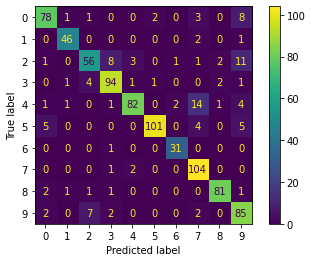

In [19]:
import matplotlib.pyplot as plt
from sklearn import metrics

y_p = model.predict(X_test)

actual = np.argmax(y_test, axis=1)
predicted = np.argmax(y_p, axis=1)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

GRAPHS

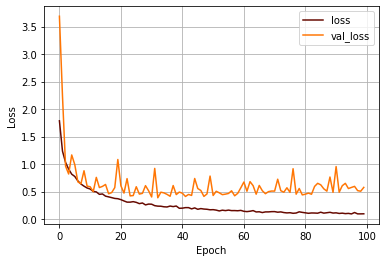

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"],label = "loss",color="#660900")
plt.plot(history.history["val_loss"],label = "val_loss",color="#FF7605")
plt.xlabel("EPOCH")
plt.ylabel("LOSS")
plt.legend()
plt.grid(True)

plt.show()

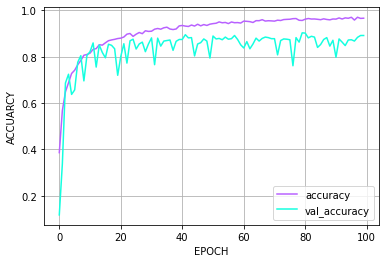

In [31]:
plt.plot(history.history["accuracy"] , label="accuracy",color="#B861FF")
plt.plot(history.history["val_accuracy"] , label = "val_accuracy",color="#14FFE0")
plt.xlabel("EPOCH")
plt.ylabel("ACCUARCY")
plt.legend()
plt.grid(True)
plt.show()